# Practice PS07: Outlier analysis

Author: <font color="blue">José M. Pérez Clar</font>

E-mail: <font color="blue">josemaria.perez02@estudiant.upf.edu</font>

Date: <font color="blue">3/12/2023</font>

Please note that due to the randomness of some parts of the code, different executions might yield slightly different results.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import io
import random
import numpy as np

# 1. Dataset

In [2]:
# LEAVE AS-IS

df = pd.read_csv('annthyroid.csv', sep=',')

# Replace the "label" column by an "abnormal" column
df['result'] = df['label'].apply(lambda x: 'abnormal' if x == 1 else 'normal')
df.drop(columns=['label'], inplace=True)

<font size="+1" color="red">Replace this cell with your code to print the number and percentages of patients in each group.</font>

In [3]:
total_patients = len(df)

normal_patients = df[df['result'] == 'normal'].shape[0]
normal_percentage = (normal_patients / total_patients) * 100

abnormal_patients = df[df['result'] == 'abnormal'].shape[0]
abnormal_percentage = (abnormal_patients / total_patients) * 100

print("Total number of patients:", total_patients)
print("Number of patients with a normal thyroid:", normal_patients, "(", normal_percentage, ")")
print("Number of patients with a abnormal thyroid:", abnormal_patients, "(", abnormal_percentage, ")")

Total number of patients: 7200
Number of patients with a normal thyroid: 6666 ( 92.58333333333333 )
Number of patients with a abnormal thyroid: 534 ( 7.416666666666667 )


<font size="+1" color="red">Replace this cell with your code to print the first 10 normal exams and their centroid, and the first 10 abnormal exams and their centroid.</font>

In [4]:
normal_exams = df[df['result'] == 'normal']
normal_exams_centroid = normal_exams.mean()

abnormal_exams = df[df['result'] == 'abnormal']
abnormal_exams_centroid = abnormal_exams.mean()

print("Normal Exams:\n", normal_exams.head(10))
print("\nCentroid of normal exams:\n", normal_exams_centroid)

print("\n\nAbnormal Exams:\n", abnormal_exams.head(10))
print("\nCentroid of abnormal exams:\n", abnormal_exams_centroid)

Normal Exams:
      f1       f2     f3     f4     f5     f6  result
0  0.73  0.00060  0.015  0.120  0.082  0.146  normal
1  0.24  0.00025  0.030  0.143  0.133  0.108  normal
2  0.47  0.00190  0.024  0.102  0.131  0.078  normal
3  0.64  0.00090  0.017  0.077  0.090  0.085  normal
4  0.23  0.00025  0.026  0.139  0.090  0.153  normal
5  0.69  0.00025  0.016  0.086  0.070  0.123  normal
6  0.85  0.00025  0.023  0.128  0.104  0.121  normal
7  0.48  0.00208  0.020  0.086  0.078  0.110  normal
8  0.67  0.00130  0.024  0.087  0.109  0.080  normal
9  0.76  0.00010  0.029  0.124  0.128  0.097  normal

Centroid of normal exams:
 f1    0.518314
f2    0.002098
f3    0.020384
f4    0.112193
f5    0.097705
f6    0.116132
dtype: float64


Abnormal Exams:
        f1       f2      f3      f4     f5      f6    result
10   0.62  0.01100  0.0080  0.0730  0.074  0.0980  abnormal
19   0.50  0.06100  0.0096  0.0130  0.116  0.0110  abnormal
27   0.78  0.02500  0.0090  0.0500  0.084  0.0600  abnormal
43   0.61 

C:\Users\josep\AppData\Local\Temp\ipykernel_31968\519538302.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  normal_exams_centroid = normal_exams.mean()
C:\Users\josep\AppData\Local\Temp\ipykernel_31968\519538302.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  abnormal_exams_centroid = abnormal_exams.mean()


<font size="+1" color="red">Replace this cell with a brief comment indicating, based only on the means, which features do you think could be useful for differentiating between normal and abnormal thyroids? Why?</font>

The features which will be useful will be the ones in which the centroid varies the most, in other words, the features which are the most different.

Looking at the results, we can see there are significant differences mainly in feature f2. Moreover, features f1 and f5 will NOT help us differentiate between normal and abnormal patients since they are almost identical, while features f3, f4 and f6 can serve as indicators when combined, but definetely are not as clear markers as f2.

<font size="+1" color="red">Replace this cell with your code to create a scatter matrix as described above.</font>

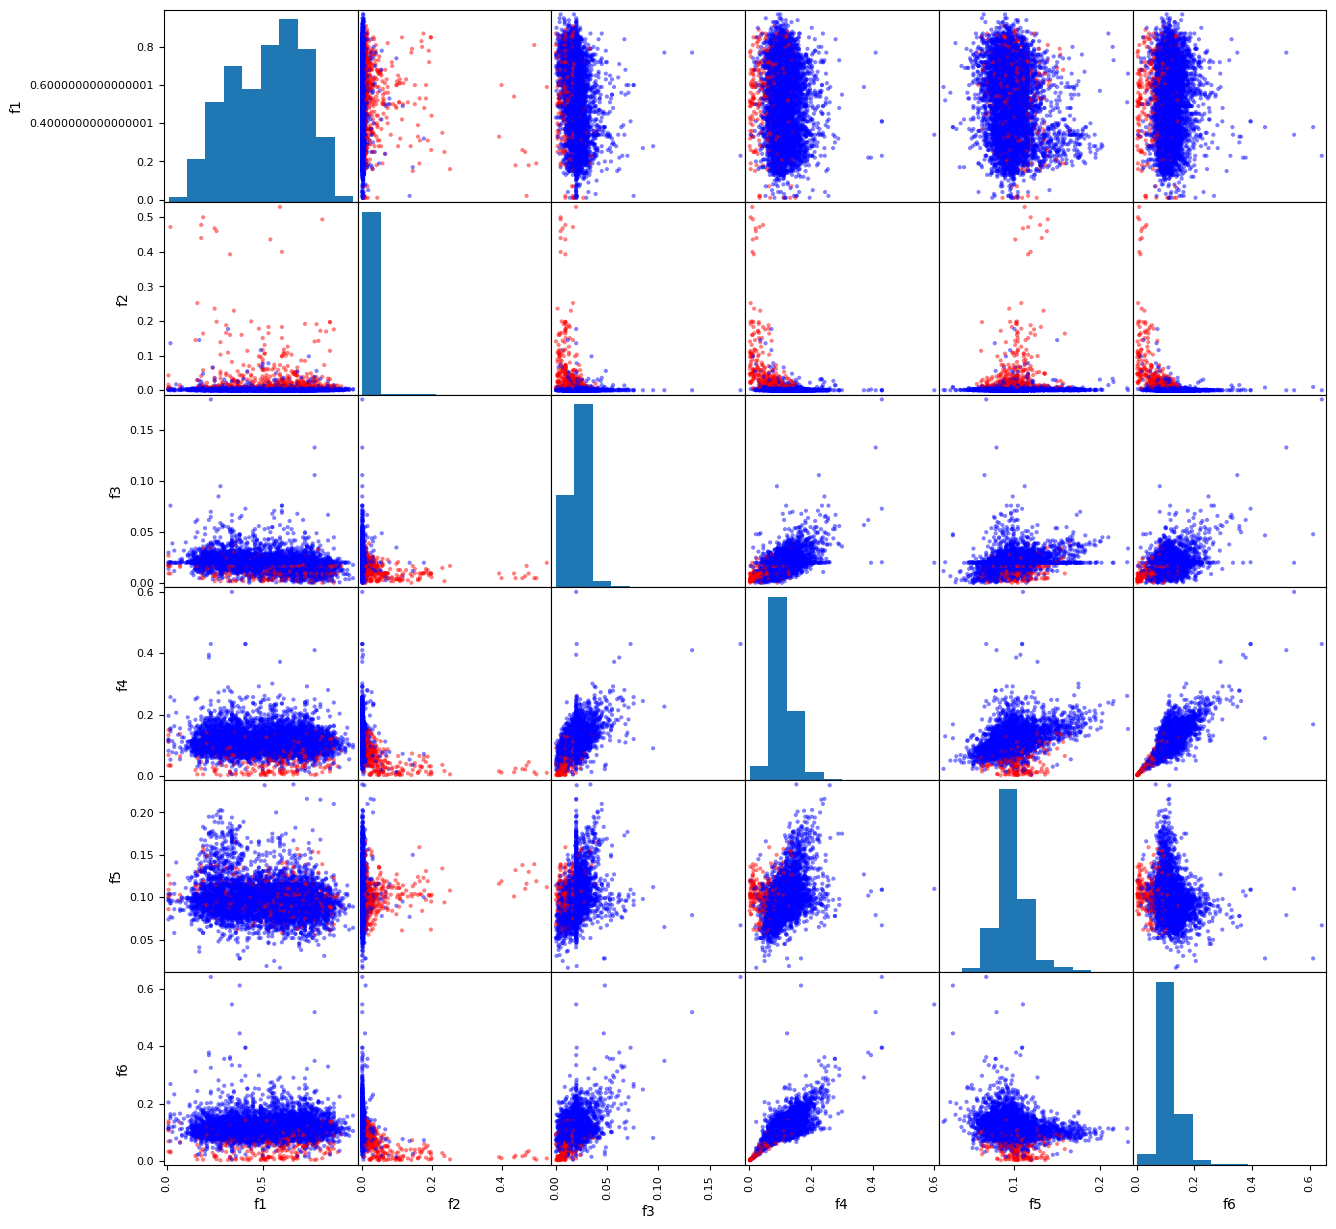

In [5]:
color_code = {'abnormal': 'red', 'normal': 'blue'}

colors = df['result'].apply(lambda x: color_code[x])

pd.plotting.scatter_matrix(df, c=colors, figsize=(15, 15))

plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary on whether you already guess any difference between normal and abnormal exams, based on combinations of features. What are the differences you can appreciate?</font>

Features f1 and f5 do not represent clear indicators. This is reinforced by the fact that we can see they seem very normally distributed when looking at their plots. Feature f2 is the main differentiating factor between normal and abnormal patients while features f3, f4 and f6 can give an "intuition" on whether a patient is normal or abnormal but need to be combined with f2 to have a much better idea of how accurate is that "intuition". Lastly, we can also see how features which are the best at describing abnormal patients have the longest tails in the distribution, representing those "outliers" that the abnormal patients can be identified as.

# 1. Create isolation tree

## 1.1. Random dimension and random split

<font size="+1" color="red">Replace this cell with code implementing "pick_random_dimension" and a couple of calls to this function.</font>

In [6]:
def pick_random_dimension(df, columns_to_ignore):
    available_dimensions = [col for col in df.columns if col not in columns_to_ignore] #with this statement we can directly filter the columns we do not want to be included
    return random.choice(available_dimensions)


print(pick_random_dimension(df, ['result', 'id']))
print(pick_random_dimension(df, ['result', 'id']))
print(pick_random_dimension(df, ['result', 'id']))
print(pick_random_dimension(df, ['result', 'id']))
print(pick_random_dimension(df, ['result', 'id']))

f2
f2
f1
f1
f5


<font size="+1" color="red">Replace this cell with code implementing "pick_random_split" and a couple of calls to test this function; each call should return a random split point chosen uniformly at random between the minimum and the maximum value along a dimension.</font>

In [7]:
def pick_random_split(df, dimension):
    min_ = np.min(df[dimension])
    max_= np.max(df[dimension])
    split = random.uniform(min_, max_)
    return split

print(pick_random_split(df, 'f2'))
print(pick_random_split(df, 'f3'))
print(pick_random_split(df, 'f5'))
print(pick_random_split(df, 'f6'))

0.14970705356548444
0.027675227087402055
0.05268588931952058
0.3085016597534077


## 1.2. Implement split data into two

<font size="+1" color="red">Replace this cell with code implementing "split_dataset".</font>

In [8]:
def split_dataset(df, dimension, split):
    dataset_1 = df[df[dimension] <= split]
    dataset_2 = df[df[dimension] > split]
    
    return dataset_1, dataset_2

<font size="+1" color="red">Replace this cell with code testing "split_dataset", i.e., select a dimension and a cut-off and split the dataset, then print the two pieces and check that it is working correctly.</font>

In [9]:
dataset1, dataset2 = split_dataset(df, 'f1', 0.5)

print("Dataset 1:\n", dataset1)
print("\n\nDataset 2:\n", dataset2)

Dataset 1:
         f1       f2      f3       f4     f5       f6  result
1     0.24  0.00025  0.0300  0.14300  0.133  0.10800  normal
2     0.47  0.00190  0.0240  0.10200  0.131  0.07800  normal
4     0.23  0.00025  0.0260  0.13900  0.090  0.15300  normal
7     0.48  0.00208  0.0200  0.08600  0.078  0.11000  normal
11    0.18  0.00010  0.0230  0.09800  0.085  0.11500  normal
...    ...      ...     ...      ...    ...      ...     ...
7171  0.46  0.00170  0.0201  0.13500  0.104  0.12900  normal
7179  0.33  0.00230  0.0201  0.07700  0.083  0.09300  normal
7180  0.30  0.00170  0.0230  0.08300  0.081  0.10200  normal
7192  0.45  0.00077  0.0201  0.11329  0.096  0.11776  normal
7198  0.35  0.00280  0.0201  0.09000  0.089  0.10100  normal

[3169 rows x 7 columns]


Dataset 2:
         f1       f2      f3     f4     f5      f6    result
0     0.73  0.00060  0.0150  0.120  0.082  0.1460    normal
3     0.64  0.00090  0.0170  0.077  0.090  0.0850    normal
5     0.69  0.00025  0.0160  0.086  0

## 1.3. Create one isolation tree

In [10]:
# LEAVE AS-IS

dfi = df.copy()
dfi.insert(0, 'id', [("P%.4d" % x) for x in range(1, 1 + len(df))])
dfi

,id,f1,f2,f3,f4,f5,f6,result
0,P0001,0.73,0.00060,0.0150,0.120,0.082,0.1460,normal
1,P0002,0.24,0.00025,0.0300,0.143,0.133,0.1080,normal
2,P0003,0.47,0.00190,0.0240,0.102,0.131,0.0780,normal
3,P0004,0.64,0.00090,0.0170,0.077,0.090,0.0850,normal
4,P0005,0.23,0.00025,0.0260,0.139,0.090,0.1530,normal
...,...,...,...,...,...,...,...,...
7195,P7196,0.59,0.00250,0.0208,0.079,0.099,0.0800,normal
7196,P7197,0.51,0.10600,0.0060,0.005,0.089,0.0055,abnormal
7197,P7198,0.51,0.00076,0.0201,0.090,0.067,0.1340,normal
7198,P7199,0.35,0.00280,0.0201,0.090,0.089,0.1010,normal


<font size="+1" color="red">Replace this cell with you code implementing "isolation_tree".</font>

In [11]:
def isolation_tree(data, columns_to_ignore, min_items):
    tree = {}
    if len(data) <= min_items:
        return {"contents": data}
    else:
        dimension = pick_random_dimension(data, columns_to_ignore)
        split = pick_random_split(data, dimension)
        left_data, right_data = split_dataset(data, dimension, split)
        
        left_tree = isolation_tree(left_data, columns_to_ignore, min_items)
        right_tree = isolation_tree(right_data, columns_to_ignore, min_items)
    
        return {"left": left_tree, "right": right_tree, "dimension": dimension, "split": split}

In [12]:
# LEAVE AS-IS

mytree = isolation_tree(dfi, ['id', 'result'], 2000)

In [13]:
# LEAVE AS-IS

class tree_drawing(object):
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right

    def __str__(self, label='', level=0):
        ret = "-" * level + label + ":" + repr(self.value)+"\n"
        if self.left:
            ret += self.left.__str__("<", level+1)
        if self.right:
            ret += self.right.__str__(">", level+1)
        return ret

    def __repr__(self):
        return self.value
    
def tree_to_nodes(tree):
    if 'contents' in tree:
        data = tree['contents']
        normal_count = len(data[data['result'] == 'normal'])
        abnormal_count = len(data[data['result'] == 'abnormal'])
        description = "external node: %d normal + %d abnormal" % (normal_count, abnormal_count)
        return tree_drawing(description)
    else:
        left = tree['left']
        right = tree['right']
        description = 'internal node: ' + tree['dimension'] + ' <= ' + ("%.2f" % tree['split'])
        n = tree_drawing(description, tree_to_nodes(left), tree_to_nodes(right) )
        return n

In [14]:
print(tree_to_nodes(mytree))

:'internal node: f1 <= 0.54'
-<:'internal node: f6 <= 0.11'
--<:'external node: 1510 normal + 190 abnormal'
-->:'external node: 1863 normal + 36 abnormal'
->:'internal node: f4 <= 0.26'
--<:'internal node: f2 <= 0.08'
---<:'internal node: f4 <= 0.15'
----<:'internal node: f5 <= 0.15'
-----<:'internal node: f5 <= 0.04'
------<:'external node: 4 normal + 0 abnormal'
------>:'internal node: f1 <= 0.79'
-------<:'internal node: f3 <= 0.02'
--------<:'internal node: f6 <= 0.09'
---------<:'external node: 275 normal + 113 abnormal'
--------->:'external node: 1864 normal + 115 abnormal'
-------->:'external node: 431 normal + 15 abnormal'
------->:'external node: 371 normal + 34 abnormal'
----->:'external node: 8 normal + 4 abnormal'
---->:'external node: 333 normal + 1 abnormal'
--->:'external node: 1 normal + 26 abnormal'
-->:'external node: 6 normal + 0 abnormal'



<font size="+1" color="red">Replace this cell with you code implementing `get_max_tree_depth`</font>

In [15]:
def get_max_tree_depth(tree):
    if 'contents' in tree:
        return 1
    else:
        left_depth = get_max_tree_depth(tree['left'])
        right_depth = get_max_tree_depth(tree['right'])
        return max(left_depth, right_depth) + 1

<font size="+1" color="red">Replace this cell with you code testing `get_max_tree_depth` on `mytree`.</font>

In [16]:
get_max_tree_depth(mytree)

10

## 2.1. Create an isolation forest

<font size="+1" color="red">Replace this cell with you code implementing "isolation_tree".</font>

In [17]:
def isolation_forest(dfi, columns_to_ignore, min_items, num_trees):
    trees = []

    for j in range(num_trees):
        tree = isolation_tree(dfi, columns_to_ignore, min_items)
        trees.append(tree)

    return trees

In [18]:
# MODIFY IF YOU SEE THAT IT IMPROVES THE SEPARATION BETWEEN CLASSES

min_items = 50
num_trees = 20

In [19]:
# LEAVE AS-IS

myforest = isolation_forest(dfi, ['id', 'result'], min_items, num_trees)
print("The forest has %d trees" % len(myforest))

The forest has 20 trees


In [20]:
# Leave this code as-is

for i in range(0, 2):
    print("Tree number %d" % i)
    print(tree_to_nodes(myforest[i]))
    print()

Tree number 0
:'internal node: f1 <= 0.91'
-<:'internal node: f4 <= 0.03'
--<:'internal node: f4 <= 0.01'
---<:'internal node: f2 <= 0.25'
----<:'external node: 3 normal + 44 abnormal'
---->:'external node: 0 normal + 5 abnormal'
--->:'external node: 15 normal + 34 abnormal'
-->:'internal node: f1 <= 0.44'
---<:'internal node: f6 <= 0.45'
----<:'internal node: f5 <= 0.08'
-----<:'internal node: f6 <= 0.34'
------<:'internal node: f3 <= 0.01'
-------<:'external node: 9 normal + 0 abnormal'
------->:'internal node: f6 <= 0.06'
--------<:'external node: 3 normal + 0 abnormal'
-------->:'internal node: f2 <= 0.06'
---------<:'internal node: f6 <= 0.15'
----------<:'internal node: f1 <= 0.14'
-----------<:'external node: 6 normal + 0 abnormal'
----------->:'internal node: f3 <= 0.03'
------------<:'internal node: f5 <= 0.05'
-------------<:'external node: 3 normal + 0 abnormal'
------------->:'internal node: f6 <= 0.14'
--------------<:'internal node: f4 <= 0.11'
---------------<:'internal 

:'internal node: f6 <= 0.52'
-<:'internal node: f3 <= 0.07'
--<:'internal node: f1 <= 0.64'
---<:'internal node: f6 <= 0.26'
----<:'internal node: f3 <= 0.05'
-----<:'internal node: f3 <= 0.05'
------<:'internal node: f2 <= 0.45'
-------<:'internal node: f6 <= 0.03'
--------<:'internal node: f6 <= 0.01'
---------<:'external node: 1 normal + 19 abnormal'
--------->:'internal node: f6 <= 0.02'
----------<:'external node: 3 normal + 28 abnormal'
---------->:'external node: 7 normal + 14 abnormal'
-------->:'internal node: f3 <= 0.01'
---------<:'internal node: f4 <= 0.15'
----------<:'internal node: f1 <= 0.42'
-----------<:'internal node: f5 <= 0.08'
------------<:'external node: 23 normal + 0 abnormal'
------------>:'internal node: f4 <= 0.09'
-------------<:'external node: 41 normal + 8 abnormal'
------------->:'external node: 42 normal + 6 abnormal'
----------->:'internal node: f1 <= 0.44'
------------<:'external node: 12 normal + 1 abnormal'
------------>:'internal node: f1 <= 0.57'


## 2.2. Find the average depth of an item

In [21]:
# LEAVE AS-IS

def find_element_depth_aux(tree, column_name, column_value, depth):
    
    if 'contents' in tree:
        # We are in a leaf node
        
        data = tree['contents']
        matching = data[data[column_name] == column_value]
        if len(matching) == 0:
            return None
        elif len(matching) > 1:
            print("Error: multiple elements match your search criterion")
            return None
        else:
            return depth
    else:
        # We are in an internal node
        
        in_left = find_element_depth_aux(tree['left'], column_name, column_value, depth+1)
        if in_left == None:
            in_right = find_element_depth_aux(tree['right'], column_name, column_value, depth+1)
            return in_right
        else:
            return in_left
        
def find_element_depth(tree, column_name, column_value):
    return find_element_depth_aux(tree, column_name, column_value, 0)

In [22]:
# LEAVE AS-IS

def print_sample_depths(df, sample_size, tested_tree):

    for result in ['normal', 'abnormal']:
        print("Depths for %s items" % result)

        sample = list(df[df['result'] == result]['id'].sample(sample_size))

        max_depth = get_max_tree_depth(tested_tree)
        for random_id in sample:
            print("- id=%s is at depth %d/%d" % (random_id, find_element_depth(tested_tree, "id", random_id), max_depth))
            
    
print("On shallow tree, having maximum depth %d" % get_max_tree_depth(mytree))
print_sample_depths(dfi, 5, mytree)
print()

print("On first tree of forest, having maximum depth %d" % get_max_tree_depth(myforest[0]))
print_sample_depths(dfi, 5, myforest[0])
print()


On shallow tree, having maximum depth 10
Depths for normal items
- id=P3107 is at depth 2/10
- id=P2010 is at depth 2/10
- id=P0343 is at depth 2/10
- id=P1961 is at depth 4/10
- id=P0223 is at depth 9/10
Depths for abnormal items
- id=P1105 is at depth 9/10
- id=P7065 is at depth 9/10
- id=P3842 is at depth 9/10
- id=P2885 is at depth 2/10
- id=P1429 is at depth 9/10

On first tree of forest, having maximum depth 47
Depths for normal items
- id=P2492 is at depth 19/47
- id=P6355 is at depth 25/47
- id=P0671 is at depth 28/47
- id=P4149 is at depth 8/47
- id=P5844 is at depth 22/47
Depths for abnormal items
- id=P3513 is at depth 3/47
- id=P2625 is at depth 21/47
- id=P0011 is at depth 22/47
- id=P1585 is at depth 23/47
- id=P0839 is at depth 10/47



<font size="+1" color="red">Replace this cell with a brief commentary on these depths.</font>

The depths represent how many levels an item needs to traverse from the root of the isolation tree to reach the leaf node. 

In the shallow tree, the depths are  low, indicating that items are reaching leaf nodes with fewer splits. This causes abnormal observations to not be as easily identified by their depth, which is the goal of an Isolation forest.On the other hand, in the first tree of the forest, the depths are higher, reflecting the deeper structure of the tree. In this tree we can see how normal items tend to have higher depths compared to abnormal items. Basically, the depth information provides insight into how isolated or distinct an item is within the isolation tree. Lower depths suggest that the item is more isolated, while higher depths indicate less isolation.

<font size="+1" color="red">Replace this cell with you code implementing "find_average_depth".</font>

In [23]:
def find_average_depth(forest, column_name, value):
    
    total_depth = 0
    num_trees_nonzero = 0

    for tree in forest:
        depth = find_element_depth(tree, column_name, value)
        if depth is not None:
            total_depth += depth
            num_trees_nonzero+= 1

    if num_trees_nonzero == 0:
        print("No trees in the forest have", column_name, "=", value)
        return None

    return total_depth / num_trees_nonzero

In [24]:
# LEAVE AS-IS

for result in ['normal', 'abnormal']:
    print("Average depths for %s items" % result)
    
    sample = list(dfi[dfi['result'] == result]['id'].sample(5))
    
    for random_id in sample:
        print("- id=%s is at average depth %.1f" % (random_id, find_average_depth(myforest, "id", random_id)))
    
    print()

Average depths for normal items
- id=P2367 is at average depth 23.3
- id=P0233 is at average depth 20.4
- id=P6398 is at average depth 10.9
- id=P3397 is at average depth 24.4
- id=P1281 is at average depth 22.1

Average depths for abnormal items
- id=P3307 is at average depth 11.4
- id=P0746 is at average depth 18.8
- id=P6592 is at average depth 21.1
- id=P6482 is at average depth 19.1
- id=P6328 is at average depth 16.3



<font size="+1" color="red">Replace this cell with a brief commentary indicating how would you make the "find_average_depth" function more efficient if you wanted to obtain the average depth of **all** elements. Be concise but be precise, providing pseudocode if you consider it clearer than a text explanation.</font>

If we wanted to make such large calculations, big for loops would stop being an option since they have a high time compleixity and take very long, specially for very large loops like the ones we want to conduct. Instead, it would be a more efficient coding idea to use NumPy in order to vectorize our operations so that in the same loop we could calculate the average depth for multiple elements much faster. For instance, we could modify our function to allow parallelisation (this is not related to NumPy) or modify "find_element_depth" so that it is not as dependent on recursivity and can operate on multiple points at once, reducing the execution time very considerably.

Nonetheless, we would need to test the function and find out whehter these changes would truly improve the performance or they are too focused in large size items and the loss of performance is too big for small size items.

# 3. Find the average depth of a sample of normal and abnormal points

## 3.1. Determine average depths

In [25]:
# LEAVE AS-IS

abnormal_point_ids = list(dfi[dfi['result'] == 'abnormal']['id'].sample(30))
normal_point_ids = list(dfi[dfi['result'] == 'normal']['id'].sample(30))

print("Normal point sample ids   : %s" % normal_point_ids)
print("Abnormal point sample ids : %s" % abnormal_point_ids)

Normal point sample ids   : ['P0840', 'P0484', 'P1793', 'P2861', 'P5799', 'P4709', 'P3342', 'P3375', 'P4248', 'P1243', 'P5601', 'P5889', 'P3410', 'P4961', 'P0194', 'P4121', 'P5247', 'P3492', 'P0771', 'P3301', 'P5567', 'P4177', 'P3524', 'P5746', 'P3172', 'P4275', 'P2376', 'P4508', 'P4616', 'P1949']
Abnormal point sample ids : ['P3676', 'P5449', 'P5708', 'P0778', 'P3650', 'P5176', 'P5508', 'P5264', 'P6357', 'P1226', 'P5854', 'P4943', 'P7059', 'P3197', 'P4722', 'P1276', 'P7068', 'P4156', 'P6257', 'P1166', 'P6574', 'P5648', 'P7029', 'P5085', 'P3898', 'P0488', 'P5941', 'P5074', 'P4647', 'P4696']


In [26]:
# LEAVE AS-IS

normal_depths = []
print("Depths of items in the 'normal' sample:")
for i in normal_point_ids:
    depth = find_average_depth(myforest, 'id', i)
    normal_depths.append(depth)
    print(" element id=%s is at average depth %.2f" % (i, depth))
print()

Depths of items in the 'normal' sample:
 element id=P0840 is at average depth 22.05
 element id=P0484 is at average depth 30.45
 element id=P1793 is at average depth 16.90
 element id=P2861 is at average depth 11.75
 element id=P5799 is at average depth 22.20
 element id=P4709 is at average depth 18.30
 element id=P3342 is at average depth 24.20
 element id=P3375 is at average depth 21.10
 element id=P4248 is at average depth 19.85
 element id=P1243 is at average depth 25.00
 element id=P5601 is at average depth 13.45
 element id=P5889 is at average depth 20.35
 element id=P3410 is at average depth 16.60
 element id=P4961 is at average depth 30.45
 element id=P0194 is at average depth 24.45
 element id=P4121 is at average depth 19.95
 element id=P5247 is at average depth 32.60
 element id=P3492 is at average depth 20.45
 element id=P0771 is at average depth 24.80
 element id=P3301 is at average depth 27.20
 element id=P5567 is at average depth 22.65
 element id=P4177 is at average dept

In [27]:
# LEAVE AS-IS

abnormal_depths = []
print("Depths of items in the 'abnormal' sample:")
for i in abnormal_point_ids:
    depth = find_average_depth(myforest, 'id', i)
    abnormal_depths.append(depth)
    print(" element id=%s is at average depth %.2f" % (i, depth))
print()

Depths of items in the 'abnormal' sample:
 element id=P3676 is at average depth 18.00
 element id=P5449 is at average depth 13.90
 element id=P5708 is at average depth 13.50
 element id=P0778 is at average depth 16.50
 element id=P3650 is at average depth 19.50
 element id=P5176 is at average depth 13.30
 element id=P5508 is at average depth 5.40
 element id=P5264 is at average depth 22.00
 element id=P6357 is at average depth 17.35
 element id=P1226 is at average depth 20.20
 element id=P5854 is at average depth 19.60
 element id=P4943 is at average depth 19.60
 element id=P7059 is at average depth 3.30
 element id=P3197 is at average depth 20.90
 element id=P4722 is at average depth 6.50
 element id=P1276 is at average depth 8.65
 element id=P7068 is at average depth 21.15
 element id=P4156 is at average depth 18.35
 element id=P6257 is at average depth 23.55
 element id=P1166 is at average depth 19.85
 element id=P6574 is at average depth 21.25
 element id=P5648 is at average depth 

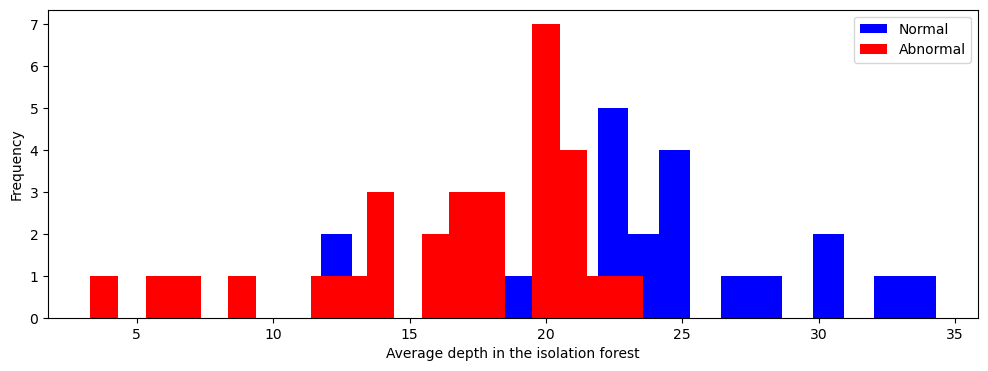

In [28]:
# LEAVE AS-IS

plt.figure(figsize=(12,4))
plt.hist(normal_depths, label='Normal', bins=20, density=False, color='blue')
plt.hist(abnormal_depths, label='Abnormal', bins=20, density=False, color='red')
plt.xlabel('Average depth in the isolation forest')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary of what you see in this histogram.</font>

We can see how, even though there is some overlap of normal and abnormal elements, the abnormal elements occupy nodes with a smaller average depth in the isolation forest. Moreover, even in this overlap, we see that it is much more common to observe abnormal patients at these lower depths while it it much more frequent to observe normal patients at higher depths. This is the fundamental reason of why isolation forests are useful in the outlier detection. Moreover, the overlapping of normal and abnormal elements could most likely be reduced by modifying the parameters of the forest (min_values and num_trees), bearing in mind the following conditions.

Increasing min_items affects the minimum number of samples required to create a split in a tree. Higher values can make the trees more refined and potentially increase the separation between normal and abnormal elements. However, since more items are required for separation, the max_depth will decrease and if our number of elements is not very high, this decrease in the depth can be counterproductive for our separations goal (when the max_depth is not very high).

On other hand, increasing num_trees can make the model more consistent, but increasing it too much can make our algorithm less sensitive to abnormal anomalies (sort of overfitting it).

It is important to find a good balance of this parameters to maximise our algorithm. I have not modified it so that this answer remains consistent when the practice is submitted, but I believe that bumping up both parameters slightly would improve the separation of elements.

## 3.2. Compute outlier scores and conclude

In [29]:
# LEAVE AS-IS

# Source: https://stackoverflow.com/a/27683292/1235784

from numpy import euler_gamma
from scipy.special import digamma
def harmonic(s):
    return digamma(s + 1) + euler_gamma

In [30]:
# LEAVE AS-IS

def outlier_score_factory():
    n = len(df.index)
    c_n = 2.0 * harmonic(n - 1.0) - (2.0 * (n-1)/n)
    return lambda d: 2.0**(-d/c_n)

outlier_score = outlier_score_factory()

normal_scores = [outlier_score(d) for d in normal_depths]
abnormal_scores = [outlier_score(d) for d in abnormal_depths]

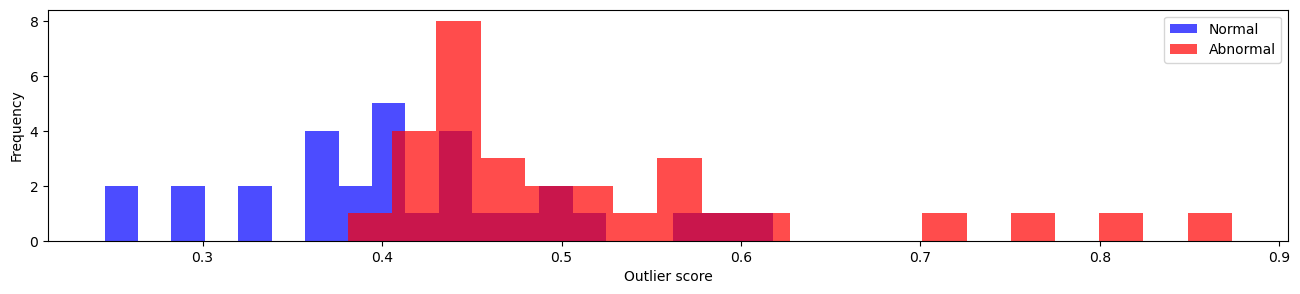

In [31]:
# LEAVE AS-IS

plt.figure(figsize=(16,3))

# Plot the two histograms; the parameter 'alpha' is the transparency of the bar
plt.hist(normal_scores, label='Normal', bins=20, density=False, color='blue', alpha=0.7)
plt.hist(abnormal_scores, label='Abnormal', bins=20, density=False, color='red', alpha=0.7)

# Draw the axis labels, legend, and display
plt.xlabel('Outlier score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary of what you see in this histogram.</font>

Outlier scores provide a measure of how "outlying" a data point is within a dataset. We can see how this scores work considerably well, giving the higher scores to more "outlying" data (abnormal patients) and almost perfectly dividing the data at around 0.43. On the other hand, elements with lower outlier scores are normal patients (observations).Even when there is overlap, we see that at lower values it's more common to observe normal patients while at higher values it's more common to observe abnormal patients.

Without forgetting that performance and definition of the two groups can always be improved, the outlier scores have worked as we could have imagined dividing considerably well our data into normal and abnormal observations.

<font size="+1" color="red">Replace this cell with your code to determine an optimal threshold.</font>

The idea behind my code is to iterate over all scores. When the trend changes from normal to abnormal scores we will consider this point of change as the threshold, as we assume we have entered the abnormal scores region and the normal observations on this region will be uncommon. The way I have done this is by implementing a way to detect a "trend change".
It can happen that the detected "trend" is the same as the previous one, and in this case nothing will happen. When the detected trend is abnormal and the previous trend is normal, we will have found the threshold.

A trend is considered to be when 3 values in a row are of the same type.

In [32]:
def find_threshold(normal_scores, abnormal_scores):

    all_scores = sorted(np.concatenate([normal_scores, abnormal_scores])) #important to sort the scores
    
    optimal_threshold = 0.0 #this will be what we return
    previous_trend = None
    current_trend = None 
    
    for value in range(len(all_scores)):
        
        if all_scores[value] in normal_scores and all_scores[value+1] in normal_scores and all_scores[value+2] in normal_scores:
            previous_trend = current_trend
            current_trend = 'normal'        
            
        if all_scores[value] in abnormal_scores and all_scores[value+1] in abnormal_scores and all_scores[value+2] in abnormal_scores:
            previous_trend = current_trend
            current_trend = 'abnormal'
            
        if previous_trend == 'normal' and current_trend == 'abnormal':
            optimal_threshold = all_scores[value]
            break

    return optimal_threshold

estimated_threshold = find_threshold(normal_scores, abnormal_scores)

print("Estimated threshold = ", estimated_threshold)

Estimated threshold =  0.4060216457626557


<font size="+1" color="red">Replace this cell with your evaluation of the optimal threshold.</font>

In [33]:
all_scores = sorted(np.concatenate([normal_scores, abnormal_scores])) #important to sort the scores
false_positives = 0
false_negatives = 0

for score in all_scores:
    
    if score > estimated_threshold and score in normal_scores:
        false_positives += 1
        
    if score <= estimated_threshold and score in abnormal_scores:
        false_negatives += 1
        
false_positive_rate = false_positives / len(normal_scores)
false_negative_rate = false_negatives / len(abnormal_scores)

print("False positive count = ", false_positives)
print("False positive rate = ", false_positive_rate)
print("False negative count = ", false_negatives)
print("False negative rate = ", false_negative_rate)

False positive count =  15
False positive rate =  0.5
False negative count =  2
False negative rate =  0.06666666666666667


Even though the number of elements in total we have is not very big, we can see how our model does perform considerably well. It is true that we are biased in the sense that we are much more likely to detect a false positive, but it is more or less fine because our rate for false negatives is low (obviously in this experimental context, otherwise the value is too high).

In summary, in our context, this method does perform well, as we are missing out on only 10% of truly abnormal observations from being identified as so. More refined threshold algorithms might be able to reduce both rates, however, the algorithm I proposed is extremely simple and could work well when implemented as a first barrier in the detection, where we know that if an observation is not detected as abnormal, it has less than a 10% chance of being abnormal that can be further studied with more complex and resource requiring algorithms.

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>